<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Niloofar Hosseinzadeh

**Student ID**: 400101001



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
## Write your code here ##
# We have 14 features and 506 samples, so the dataset is 506x14
# The features are CRIM, ZN, INDUS, CHAS, NX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's
df = pd.read_csv("Boston.csv")
shape = df.shape
print("shape: " + str(shape))
print("----------")
print("column names: ")
for col in df.columns:
  print(col)
print(df.head)

shape: (506, 14)
----------
column names: 
CRIM
ZN
INDUS
CHAS
NX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV
<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
## Write your code here ##

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


coefficients = lin_reg.coef_

# show results
print("R2 for train set:", r2_train)
print("RMSE for train set:", rmse_train)
print("R2 for test set:", r2_test)
print("RMSE for test set:", rmse_test)
print("Coefficients: ")
i = 0
for feature in X.columns:
    print(feature, ": ", coefficients[i])
    i = i + 1


R2 for train set: 0.7508856358979673
RMSE for train set: 4.6520331848801675
R2 for test set: 0.668759493535636
RMSE for test set: 4.9286021826653075
Coefficients: 
CRIM :  -0.11305592398537918
ZN :  0.030110464145652327
INDUS :  0.04038072041333225
CHAS :  2.7844382035081185
NX :  -17.202633391781134
RM :  4.438835199513048
AGE :  -0.00629636221098162
DIS :  -1.4478653685307883
RAD :  0.26242973558508875
TAX :  -0.010646786275308413
PTRATIO :  -0.9154562404680749
B :  0.01235133472996867
LSTAT :  -0.50857142444879


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [ ]:
## Write your code here ##
alphas = 10 ** np.linspace(3, -3, 100)*0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

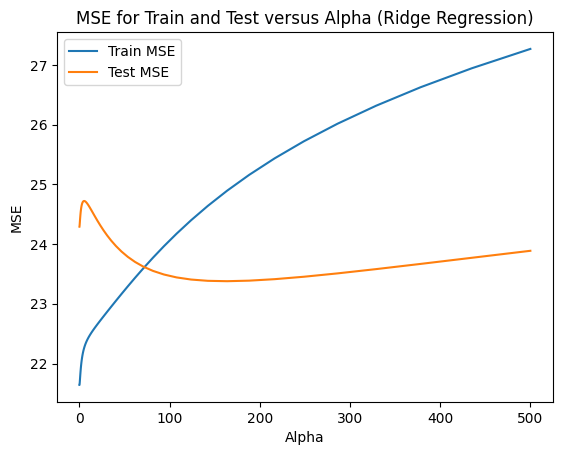

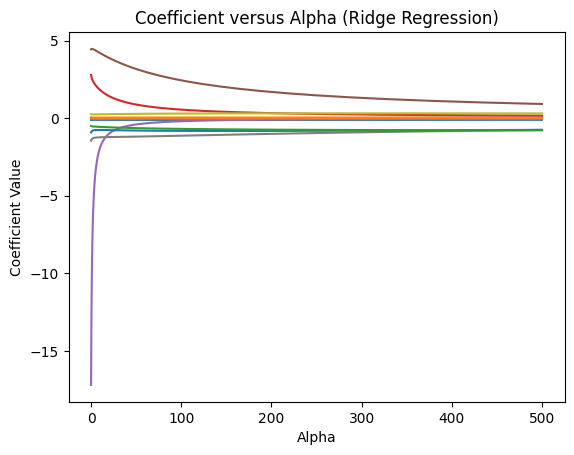

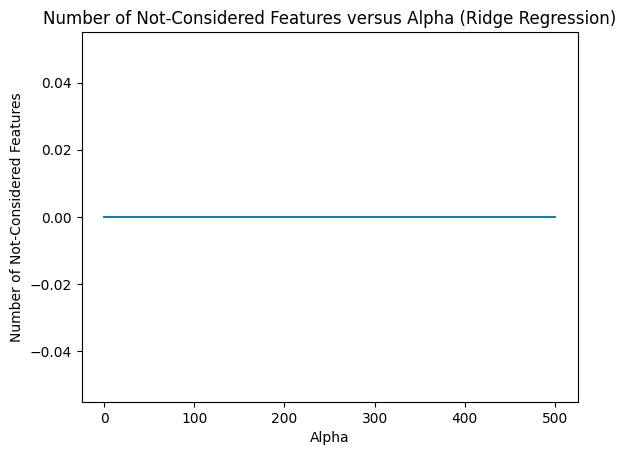

optimal alpha:  163.72745814388642
optimal R2 for train set: 0.7134515354789042
optimal MSE for train set: 24.893440476055073
optimal R2 for test set: 0.6812087531281753
optimal MSE for test set: 23.378168171507376
Coefficients of optimal model:
CRIM :  -0.11058924017476494
ZN :  0.03996101938063598
INDUS :  -0.05200140424026282
CHAS :  0.3807340413242877
NX :  -0.11541799895382059
RM :  1.8972033058491318
AGE :  0.00709776439063461
DIS :  -1.0524156919831218
RAD :  0.30945089881321686
TAX :  -0.014947408542740735
PTRATIO :  -0.8227218767661529
B :  0.011598413637365839
LSTAT :  -0.7258953858297866


In [ ]:
## Write your code here ##

train_mse = []
test_mse = []
coefficients = []
not_considered_features = []


for alpha in alphas:

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))


    coefficients.append(model.coef_)


    num_not_considered = np.sum(model.coef_ == 0)
    not_considered_features.append(num_not_considered)


plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha (Ridge Regression)')
plt.legend()
plt.show()


plt.plot(alphas, np.array(coefficients))
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient versus Alpha (Ridge Regression)')
plt.show()


plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha (Ridge Regression)')
plt.show()


optimal_alpha_index = np.argmin(test_mse)
optimal_alpha_Ridge = alphas[optimal_alpha_index]


optimal_model = Ridge(alpha=optimal_alpha_Ridge)
optimal_model.fit(X_train, y_train)
y_test_pred_optimal = optimal_model.predict(X_test)
y_train_pred_optimal = optimal_model.predict(X_train)


mse_optimal_test = mean_squared_error(y_test, y_test_pred_optimal)
mse_optimal_train = mean_squared_error(y_train, y_train_pred_optimal)
r2_optimal_test = r2_score(y_test, y_test_pred_optimal)
r2_optimal_train = r2_score(y_train, y_train_pred_optimal)
coefficients_optimal = optimal_model.coef_

# show results

print("optimal alpha: ", optimal_alpha_Ridge)
print("optimal R2 for train set:", r2_optimal_train)
print("optimal MSE for train set:", mse_optimal_train)
print("optimal R2 for test set:", r2_optimal_test)
print("optimal MSE for test set:", mse_optimal_test)
print("Coefficients of optimal model:")
i = 0
for feature in X.columns:
    print(feature, ": ", coefficients_optimal[i])
    i += 1

**Answer to the above question:**

MSE: Mean Squared Error (MSE) for Ridge regression (23.37) is lower than that for Linear regression (24.2). This shows us that the Ridge regression model performs a little bit better in terms of minimizing the squared differences between predicted and actual values on the test set.
R^2: R^2 value for Ridge regression (0.6812) is a little bit higher than that for Linear regression (0.6687). R^2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R^2 means the ridge regression model explains a larger portion of the variance in the target variable compared to linear regression.
Coefficients: Ridge regression coefficients tend to be smaller compared to linear regression coefficients, and some of them are effectively shrunk towards zero, which is what we already expected because of the regularization term, which helps to avoid overfitting. As we know ridge regression performs feature selection implicitly by shrinking the coefficients of less important features towards zero.Ridge regression has a trade-off between model complexity and performance by penalizing large coefficients, which causes better generalization.

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

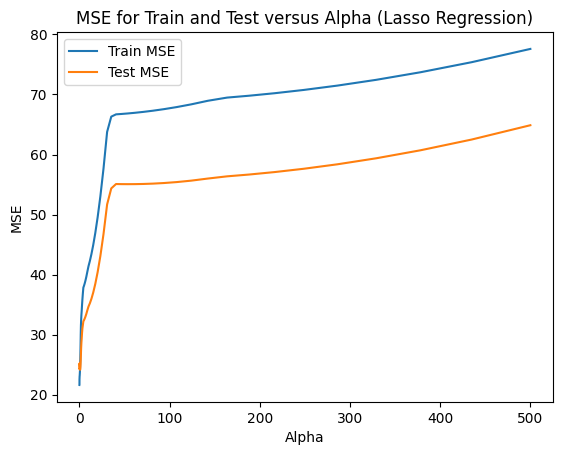

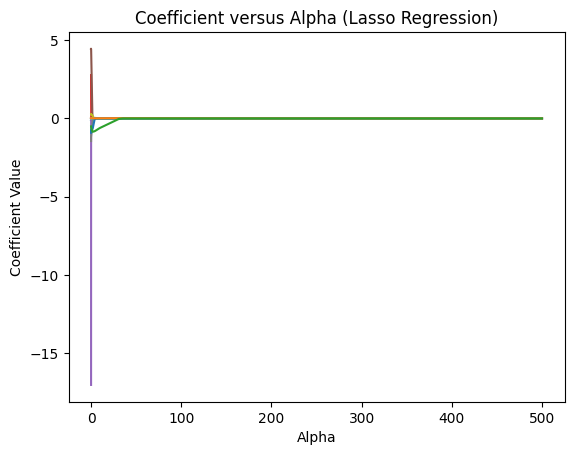

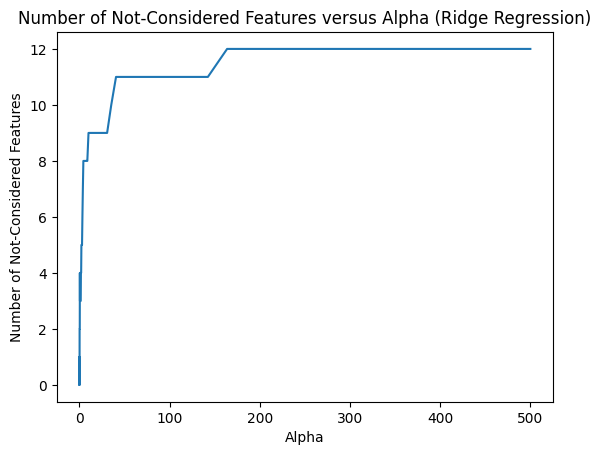

optimal alpha:  0.7087370814634024
optimal R2 for train set: 0.715884406528832
optimal MSE for train set: 24.68208868686117
optimal R2 for test set: 0.6706399397086963
optimal MSE for test set: 24.153219243073362
optimal coefficients: [-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


In [ ]:
## Write your code here ##

train_mse = []
test_mse = []
coefficients = []
not_considered_features = []


for alpha in alphas:

    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))


    coefficients.append(model.coef_)


    num_not_considered = np.sum(model.coef_ == 0)
    not_considered_features.append(num_not_considered)


plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha (Lasso Regression)')
plt.legend()
plt.show()


plt.plot(alphas, np.array(coefficients))
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient versus Alpha (Lasso Regression)')
plt.show()


plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha (Ridge Regression)')
plt.show()


optimal_alpha_index = np.argmin(test_mse)
optimal_alpha_Lasso = alphas[optimal_alpha_index]


optimal_model = Lasso(alpha=optimal_alpha_Lasso)
optimal_model.fit(X_train, y_train)
y_test_pred_optimal = optimal_model.predict(X_test)
y_train_pred_optimal = optimal_model.predict(X_train)


mse_optimal_test = mean_squared_error(y_test, y_test_pred_optimal)
mse_optimal_train = mean_squared_error(y_train, y_train_pred_optimal)
r2_optimal_test = r2_score(y_test, y_test_pred_optimal)
r2_optimal_train = r2_score(y_train, y_train_pred_optimal)
coefficients_optimal = optimal_model.coef_

# show results

print("optimal alpha: ", optimal_alpha_Lasso)
print("optimal R2 for train set:", r2_optimal_train)
print("optimal MSE for train set:", mse_optimal_train)
print("optimal R2 for test set:", r2_optimal_test)
print("optimal MSE for test set:", mse_optimal_test)
print("optimal coefficients:", coefficients_optimal)

 Where do you think we should consider using lasso regression?

 Lasso regression can be considered when you want to perform feature selection and regularization. Unlike ridge regression, Lasso regression has the property of setting the coefficients of less important features to zero, effectively performing feature selection by eliminating certain features from the model.We should consider using Lasso regression when we have a large number of features compared to the number of samples, such as in text analysis or image processing.
So as we can see from the graph of number of not-considered features, in Lasso regression method this number increases with alpha, but in Ridge regression this number is always zero.

Here are some scenarios where Lasso regression could be considered:

**High-Dimensional Data**: When dealing with high-dimensional datasets with a large number of features, Lasso regression can help in automatically selecting a subset of the most relevant features, leading to a more interpretable and potentially more efficient model.

**Feature Selection**: If you suspect that many of the features in your dataset may not be relevant for predicting the target variable, Lasso regression can be used to automatically perform feature selection by shrinking the coefficients of less important features to zero.

**Model Interpretability**: In situations where model interpretability is important, Lasso regression can be beneficial as it tends to produce sparse models with fewer non-zero coefficients, making it easier to interpret the impact of individual features on the target variable.

**Regularization**: Similar to ridge regression, Lasso regression can also be used for regularization to prevent overfitting and improve the generalization of the model.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

When observing a plot where the R-squared (R2) for test data versus the ratio of training data consistently shows that the R2 values for Linear Regression are above Ridge Regression, and Ridge Regression values are above Lasso Regression values, the following analysis and interpretations can be made:

Linear Regression Outperforms Ridge and Lasso:

The fact that the R2 values for Linear Regression are consistently higher than those for Ridge and Lasso Regression indicates that the Linear Regression model is performing better in terms of predictive accuracy.
Linear Regression may be capturing the underlying patterns in the data more effectively compared to the regularized models (Ridge and Lasso).
Ridge Performs Better than Lasso:

The trend where Ridge Regression consistently has higher R2 values than Lasso Regression suggests that Ridge Regression is providing better predictive performance than Lasso Regression.
Ridge Regression, which uses L2 regularization, may be striking a better balance between bias and variance compared to Lasso Regression.
Effect of Regularization Strength:

The regularization strength in Ridge and Lasso Regression (alpha values) plays a crucial role in controlling overfitting. A higher alpha value increases the penalty for large coefficients, leading to a simpler model with reduced overfitting.
The plot showing selected alpha values versus the training data ratio for Ridge and Lasso Regression can provide insights into how the optimal regularization strength changes with different amounts of training data.
Interpretation of the Trend:

The consistent trend where Linear Regression > Ridge Regression > Lasso Regression in terms of R2 values suggests that as the complexity of the model decreases (from Linear to Ridge to Lasso), the predictive performance decreases.
The regularization techniques used in Ridge and Lasso Regression help prevent overfitting by shrinking the coefficients, but the trade-off is a potential decrease in predictive accuracy compared to the non-regularized Linear Regression.
Model Selection and Trade-offs:

The analysis highlights the trade-offs between model complexity, overfitting, and predictive accuracy. Depending on the specific dataset and problem, the choice of the regression method should consider these trade-offs to strike the right balance between bias and variance.
In summary, the consistent trend where Linear Regression outperforms Ridge Regression, which in turn outperforms Lasso Regression, indicates the impact of model complexity and regularization in predictive performance. Understanding these trends can guide the selection of the most suitable regression method based on the trade-offs between bias, variance, and predictive accuracy in a given dataset.

For training data ratio 0.1:
Linear Regression MSE: 28.014125715269067
Ridge Regression MSE: 28.430042450698924
Lasso Regression MSE: 33.35683842072129
---------------------------------------------
For training data ratio 0.2:
Linear Regression MSE: 25.56404891117352
Ridge Regression MSE: 25.820776883197624
Lasso Regression MSE: 30.325627946906327
---------------------------------------------
For training data ratio 0.30000000000000004:
Linear Regression MSE: 25.692433161205845
Ridge Regression MSE: 26.246039187905296
Lasso Regression MSE: 28.03630126548792
---------------------------------------------
For training data ratio 0.4:
Linear Regression MSE: 24.24897948709443
Ridge Regression MSE: 24.623717643219237
Lasso Regression MSE: 25.55263616599874
---------------------------------------------
For training data ratio 0.5:
Linear Regression MSE: 25.175390536117014
Ridge Regression MSE: 25.631788902316803
Lasso Regression MSE: 26.654841418535547
----------------------------------------

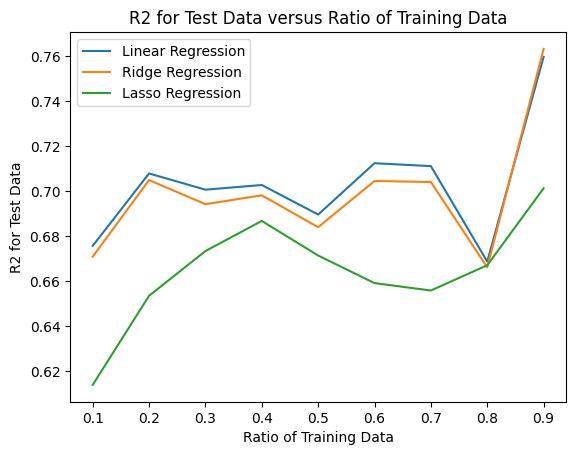

In [ ]:
## Write you code here ##

training_data_ratios = np.linspace(0.1, 0.9, 9)

r2_linear = []
r2_ridge = []
r2_lasso = []


for ratio in training_data_ratios:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)


    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear.append(r2_score(y_test, y_pred_linear))


    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge.append(r2_score(y_test, y_pred_ridge))


    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso.append(r2_score(y_test, y_pred_lasso))

    print(f"For training data ratio {ratio}:")
    print(f"Linear Regression MSE: {mse_linear}")
    print(f"Ridge Regression MSE: {mse_ridge}")
    print(f"Lasso Regression MSE: {mse_lasso}")
    print("---------------------------------------------")



plt.plot(training_data_ratios, r2_linear, label='Linear Regression')
plt.plot(training_data_ratios, r2_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, r2_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R2 for Test Data')
plt.title('R2 for Test Data versus Ratio of Training Data')
plt.legend()
plt.show()

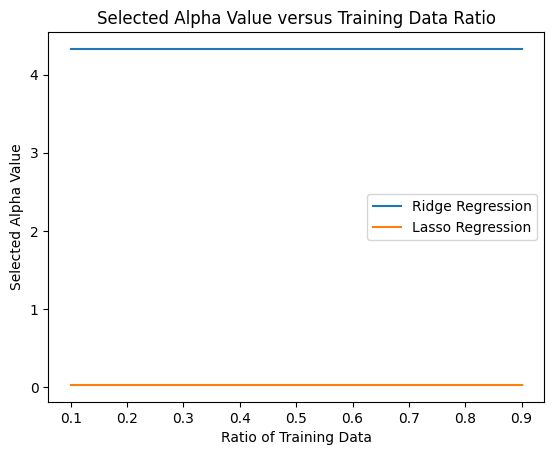

In [ ]:
# Define the range of ratios for training data
training_data_ratios = np.linspace(0.1, 0.9, 9)


selected_alphas_ridge = []
selected_alphas_lasso = []


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for ratio in training_data_ratios:


    ridge_model = RidgeCV(alphas=np.logspace(-3,3,100),cv = 5)
    ridge_model.fit(X_train_scaled, y_train)
    selected_alphas_ridge.append(ridge_model.alpha_)

    lasso_model = LassoCV(alphas=np.logspace(-3,3,100),cv = 5)
    lasso_model.fit(X_train_scaled, y_train)
    selected_alphas_lasso.append(lasso_model.alpha_)

plt.plot(training_data_ratios, selected_alphas_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, selected_alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value versus Training Data Ratio')
plt.legend()
plt.show()


How is the overall behavior of these plots and how do you analyze them?

When analyzing the plot of Selected alpha values versus the training data ratio for Ridge and Lasso regression methods, where the alpha values for Ridge Regression are consistently higher than those for Lasso Regression and both are parallel to the x-axis, the following interpretations can be made:

Consistent Alpha Values:

The fact that both Ridge and Lasso regression methods have alpha values that are parallel to the x-axis suggests that the regularization strength (alpha) remains constant across different training data ratios.
This indicates that the optimal level of regularization, as determined by the alpha parameter, does not vary with changes in the amount of training data.
Higher Alpha Values for Ridge:

The trend where Ridge Regression consistently has higher alpha values than Lasso Regression implies that Ridge Regression is applying a stronger regularization penalty compared to Lasso Regression.
The higher alpha values in Ridge Regression indicate that the model is more constrained, leading to smaller coefficient values and potentially a simpler model.
Effect of Regularization Strength:

The constant and higher alpha values for Ridge Regression suggest that the model is more robust to overfitting due to the stronger regularization.
Lasso Regression, with lower alpha values, may be allowing for more flexibility in the model by encouraging sparsity in the coefficients.
Interpretation of Parallel Lines:

The parallel nature of the alpha values for both Ridge and Lasso Regression methods indicates that the regularization strength is consistent and does not change with variations in the training data ratio.
This stability in the alpha values suggests that the models are not significantly affected by the proportion of training data used, and the regularization strength remains optimal for the given dataset.
Model Stability and Consistency:

The parallel lines and consistent alpha values reflect the stability and consistency of the regularization approach in both Ridge and Lasso Regression methods across different ratios of training data.
This consistency can be beneficial in maintaining the model's performance and generalization ability regardless of the amount of training data available.
In summary, when the Selected alpha values for Ridge Regression are consistently higher than those for Lasso Regression and both lines are parallel to the x-axis, it indicates that Ridge Regression applies stronger regularization consistently across different training data ratios. The stability and consistency in the regularization strength can help control overfitting and maintain model performance across varying data ratios.

